In [86]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [87]:
url = "http://swapi.dev/api/"
url_response = requests.get(url).json()

url_people = f"{url}people/" 
people_response = requests.get(url_people).json()

url_starships = f"{url}starships/"
starships_response = requests.get(url_starships).json()

In [89]:
character = []
height = []
mass = []
hair_color = []
skin_color = []
eye_color = []
birth_year = []
gender = []

page = ["1", "2", "3", "4", "5", "6", "7", "8"]
url_Next_Character_Page = f"{url_people}?page="

print ("Searching Character Data...\n")

for x in page:
    Next_Character_Page = requests.get(url_Next_Character_Page + x).json()
   
    for person in Next_Character_Page["results"]:

        Character_Name = person["name"]
        character.append(Character_Name)

        Character_Height = person["height"]
        height.append(Character_Height)

        Character_mass = person["mass"]
        mass.append(Character_mass)

        Character_hair_color = person["hair_color"]
        hair_color.append(Character_hair_color)

        Character_skin_color = person["skin_color"]
        skin_color.append(Character_skin_color)

        Character_eye_color = person["eye_color"]
        eye_color.append(Character_eye_color)

        Character_birth_year = person["birth_year"]
        birth_year.append(Character_birth_year)

        Character_gender = person["gender"]
        gender.append(Character_gender)

        print (f"{Character_Name}'s Physical stats have been added.")
    
print ("...Character Data Complete.")

Searching Character Data...

Luke Skywalker's Physical stats have been added.
C-3PO's Physical stats have been added.
R2-D2's Physical stats have been added.
Darth Vader's Physical stats have been added.
Leia Organa's Physical stats have been added.
Owen Lars's Physical stats have been added.
Beru Whitesun lars's Physical stats have been added.
R5-D4's Physical stats have been added.
Biggs Darklighter's Physical stats have been added.
Obi-Wan Kenobi's Physical stats have been added.
Anakin Skywalker's Physical stats have been added.
Wilhuff Tarkin's Physical stats have been added.
Chewbacca's Physical stats have been added.
Han Solo's Physical stats have been added.
Greedo's Physical stats have been added.
Jabba Desilijic Tiure's Physical stats have been added.
Wedge Antilles's Physical stats have been added.
Jek Tono Porkins's Physical stats have been added.
Yoda's Physical stats have been added.
Palpatine's Physical stats have been added.
Boba Fett's Physical stats have been added.
I

In [90]:
Character_Stat_df = pd.DataFrame({"Character Name": character,
                                  "Birth Year": birth_year,
                                  "Gender": gender,
                                  "Height (cm)": height,
                                  "Mass (kg)": mass,
                                  "Hair Color": hair_color,
                                  "Skin Color": skin_color,
                                  "Eye Color": eye_color})

Character_Stat_df

,Character Name,Birth Year,Gender,Height (cm),Mass (kg),Hair Color,Skin Color,Eye Color
0,Luke Skywalker,19BBY,male,172,77,blond,fair,blue
1,C-3PO,112BBY,n/a,167,75,n/a,gold,yellow
2,R2-D2,33BBY,n/a,96,32,n/a,"white, blue",red
3,Darth Vader,41.9BBY,male,202,136,none,white,yellow
4,Leia Organa,19BBY,female,150,49,brown,light,brown
...,...,...,...,...,...,...,...,...
75,San Hill,unknown,male,191,unknown,none,grey,gold
76,Shaak Ti,unknown,female,178,57,none,"red, blue, white",black
77,Grievous,unknown,male,216,159,none,"brown, white","green, yellow"
78,Tarfful,unknown,male,234,136,brown,brown,blue


In [91]:
Clean_Character_Stat_df = Character_Stat_df.drop(Character_Stat_df[Character_Stat_df["Height (cm)"] == "unknown"].index) 
Clean_Character_Stat_df["Character Name"].replace(regex = True, inplace = True, to_replace = "Jabba Desilijic Tiure", value = "Jabba the Hutt")

Clean_Character_Stat_df

,Character Name,Birth Year,Gender,Height (cm),Mass (kg),Hair Color,Skin Color,Eye Color
0,Luke Skywalker,19BBY,male,172,77,blond,fair,blue
1,C-3PO,112BBY,n/a,167,75,n/a,gold,yellow
2,R2-D2,33BBY,n/a,96,32,n/a,"white, blue",red
3,Darth Vader,41.9BBY,male,202,136,none,white,yellow
4,Leia Organa,19BBY,female,150,49,brown,light,brown
...,...,...,...,...,...,...,...,...
75,San Hill,unknown,male,191,unknown,none,grey,gold
76,Shaak Ti,unknown,female,178,57,none,"red, blue, white",black
77,Grievous,unknown,male,216,159,none,"brown, white","green, yellow"
78,Tarfful,unknown,male,234,136,brown,brown,blue


In [92]:
Clean_Character_Stat_df["Height (cm)"].replace(regex = True, inplace = True, to_replace = r'[^0-9.-]', value = r'')
Clean_Character_Stat_df["Height (cm)"] = Clean_Character_Stat_df["Height (cm)"].astype(float)

Character_Height_df = Clean_Character_Stat_df.sort_values("Height (cm)", ascending = True)
Character_Height_df

,Character Name,Birth Year,Gender,Height (cm),Mass (kg),Hair Color,Skin Color,Eye Color
18,Yoda,896BBY,male,66.0,17,white,green,brown
45,Ratts Tyerel,unknown,male,79.0,15,none,"grey, blue",unknown
28,Wicket Systri Warrick,8BBY,male,88.0,20,brown,brown,brown
46,Dud Bolt,unknown,male,94.0,45,none,"blue, grey",yellow
2,R2-D2,33BBY,n/a,96.0,32,n/a,"white, blue",red
...,...,...,...,...,...,...,...,...
35,Roos Tarpals,unknown,male,224.0,82,none,grey,orange
12,Chewbacca,200BBY,male,228.0,112,brown,unknown,blue
70,Lama Su,unknown,male,229.0,88,none,grey,black
78,Tarfful,unknown,male,234.0,136,brown,brown,blue


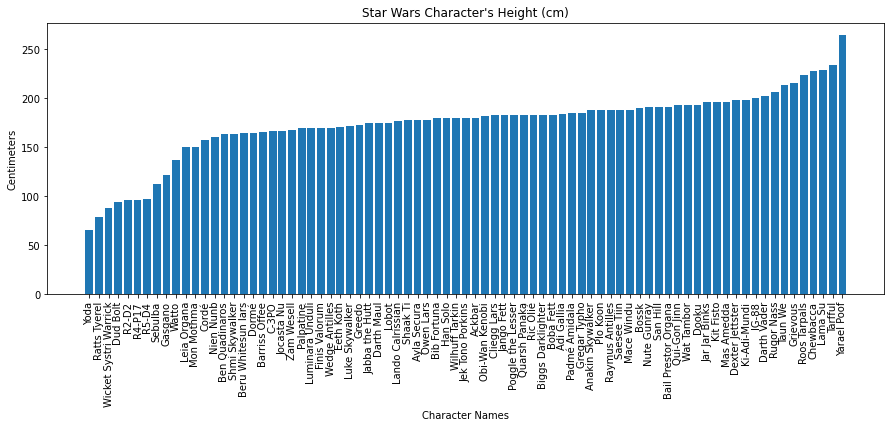

In [94]:
Character = [value for value in Character_Height_df["Character Name"]]
Character_Label = Character_Height_df["Character Name"]
plt.figure(figsize = (15, 5))
plt.bar(Character_Height_df["Character Name"], Character_Height_df["Height (cm)"])
plt.xticks(Character, Character_Label, rotation = "vertical")
plt.title("Star Wars Character's Height (cm)")
plt.xlabel("Character Names")
plt.ylabel("Centimeters")
plt.show()

In [95]:
#write some stuff about average star wars character height and how many yodas does it take to be as big as jabba

#just noticed i deleted the height sort so now the bar graph's names are a mess

In [96]:
Starship_Name = []
Starship_Model = []
Starship_Length = []
page = ["1", "2", "3", "4"]
url_Next_Starships_Page = f"{url_starships}?page="

print ("Searching Starship Data...")

for x in page:
    find_ships_response = requests.get(url_Next_Starships_Page + x).json()
    
    for ships in find_ships_response["results"]:
        Ship_Name = ships["name"]
        Starship_Name.append(Ship_Name)
        Ship_Model = ships["model"]
        Starship_Model.append(Ship_Model)
        Ship_Length = ships["length"]
        Starship_Length.append(Ship_Length)
        print (f"{Ship_Name}'s stats have been added.")

print ("...Starship Data Complete")

Searching Starship Data...
CR90 corvette's stats have been added.
Star Destroyer's stats have been added.
Sentinel-class landing craft's stats have been added.
Death Star's stats have been added.
Millennium Falcon's stats have been added.
Y-wing's stats have been added.
X-wing's stats have been added.
TIE Advanced x1's stats have been added.
Executor's stats have been added.
Rebel transport's stats have been added.
Slave 1's stats have been added.
Imperial shuttle's stats have been added.
EF76 Nebulon-B escort frigate's stats have been added.
Calamari Cruiser's stats have been added.
A-wing's stats have been added.
B-wing's stats have been added.
Republic Cruiser's stats have been added.
Droid control ship's stats have been added.
Naboo fighter's stats have been added.
Naboo Royal Starship's stats have been added.
Scimitar's stats have been added.
J-type diplomatic barge's stats have been added.
AA-9 Coruscant freighter's stats have been added.
Jedi starfighter's stats have been added.

In [97]:
Starship_df = pd.DataFrame({"Starship Name": Starship_Name, 
                            "Starship Model": Starship_Model,
                            "Length (m)": Starship_Length})
Starship_df

,Starship Name,Starship Model,Length (m)
0,CR90 corvette,CR90 corvette,150
1,Star Destroyer,Imperial I-class Star Destroyer,"1,600"
2,Sentinel-class landing craft,Sentinel-class landing craft,38
3,Death Star,DS-1 Orbital Battle Station,120000
4,Millennium Falcon,YT-1300 light freighter,34.37
5,Y-wing,BTL Y-wing,14
6,X-wing,T-65 X-wing,12.5
7,TIE Advanced x1,Twin Ion Engine Advanced x1,9.2
8,Executor,Executor-class star dreadnought,19000
9,Rebel transport,GR-75 medium transport,90


In [98]:
Starship_df["Length (m)"].replace(regex = True, inplace = True, to_replace = r'[^0-9.-]', value = r'')
Starship_df["Length (m)"] = Starship_df["Length (m)"].astype(float)

Starship_Length_df = Starship_df.sort_values("Length (m)", ascending = True)

Starship_Length_df

,Starship Name,Starship Model,Length (m)
31,Jedi Interceptor,Eta-2 Actis-class light interceptor,5.47
34,Belbullab-22 starfighter,Belbullab-22 starfighter,6.71
35,V-wing,Alpha-3 Nimbus-class V-wing starfighter,7.90
23,Jedi starfighter,Delta-7 Aethersprite-class interceptor,8.00
7,TIE Advanced x1,Twin Ion Engine Advanced x1,9.20
14,A-wing,RZ-1 A-wing Interceptor,9.60
18,Naboo fighter,N-1 starfighter,11.00
6,X-wing,T-65 X-wing,12.50
5,Y-wing,BTL Y-wing,14.00
32,arc-170,Aggressive Reconnaissance-170 starfighte,14.50


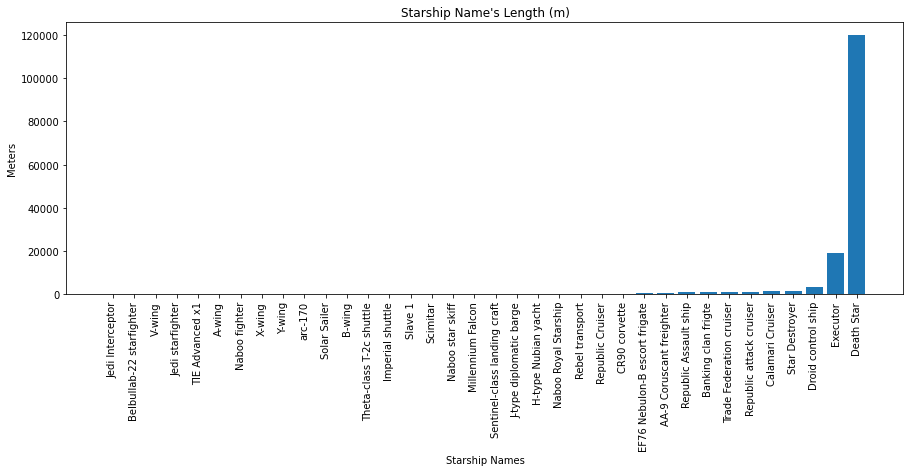

In [99]:
Ship = [value for value in Starship_Length_df["Starship Name"]]
Starship_Label = Starship_Length_df["Starship Name"]
plt.figure(figsize = (15, 5))
plt.bar(Starship_Length_df["Starship Name"], Starship_Length_df["Length (m)"])
plt.xticks(Ship, Starship_Label, rotation = "vertical")
plt.title("Starship Name's Length (m)")
plt.xlabel("Starship Names")
plt.ylabel("Meters")
plt.show()

In [100]:
Ships_Under_100m_df = Starship_Length_df[0 : 23]
Ships_Between_100m_and_10000m_df = Starship_Length_df[23 : 34]
Ships_Over_10000m_df = Starship_Length_df[34 :]
Ships_Between_100m_and_10000m_df

,Starship Name,Starship Model,Length (m)
16,Republic Cruiser,Consular-class cruiser,115.0
0,CR90 corvette,CR90 corvette,150.0
12,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,300.0
22,AA-9 Coruscant freighter,Botajef AA-9 Freighter-Liner,390.0
25,Republic Assault ship,Acclamator I-class assault ship,752.0
33,Banking clan frigte,Munificent-class star frigate,825.0
27,Trade Federation cruiser,Providence-class carrier/destroyer,1088.0
29,Republic attack cruiser,Senator-class Star Destroyer,1137.0
13,Calamari Cruiser,MC80 Liberty type Star Cruiser,1200.0
1,Star Destroyer,Imperial I-class Star Destroyer,1600.0


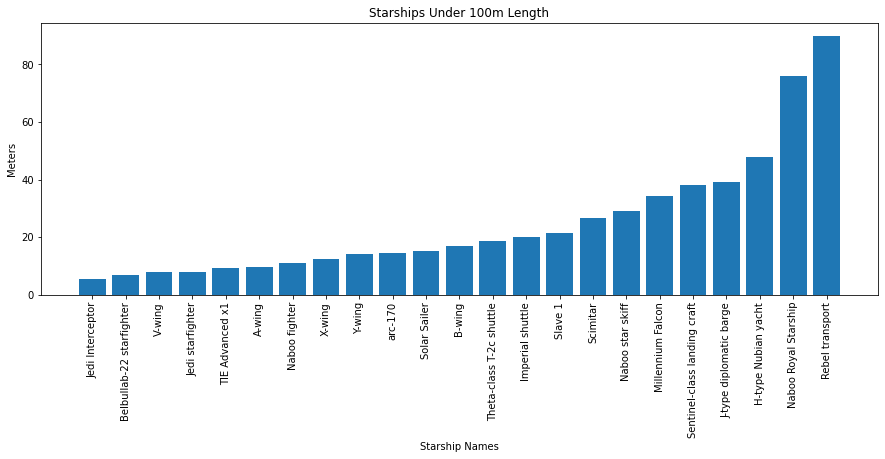

In [101]:
Ship = [value for value in Ships_Under_100m_df["Starship Name"]]
Starship_Label = Ships_Under_100m_df["Starship Name"]
plt.figure(figsize = (15, 5))
plt.bar(Ships_Under_100m_df["Starship Name"], Ships_Under_100m_df["Length (m)"])
plt.xticks(Ship, Starship_Label, rotation = "vertical")
plt.title("Starships Under 100m Length")
plt.xlabel("Starship Names")
plt.ylabel("Meters")
plt.show()

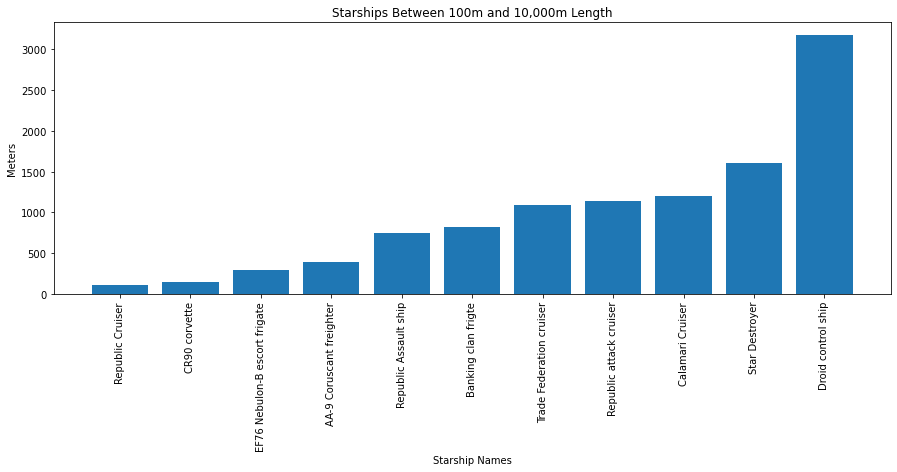

In [102]:
Ship = [value for value in Ships_Between_100m_and_10000m_df["Starship Name"]]
Starship_Label = Ships_Between_100m_and_10000m_df["Starship Name"]
plt.figure(figsize = (15, 5))
plt.bar(Ships_Between_100m_and_10000m_df["Starship Name"], Ships_Between_100m_and_10000m_df["Length (m)"])
plt.xticks(Ship, Starship_Label, rotation = "vertical")
plt.title("Starships Between 100m and 10,000m Length")
plt.xlabel("Starship Names")
plt.ylabel("Meters")
plt.show()

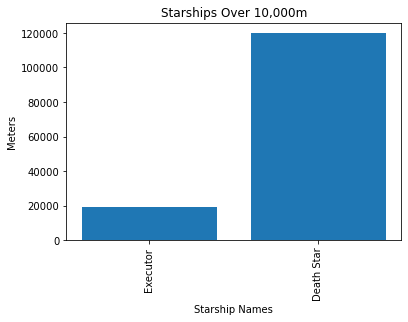

In [103]:
Ship = [value for value in Ships_Over_10000m_df["Starship Name"]]
Starship_Label = Ships_Over_10000m_df["Starship Name"]
plt.bar(Ships_Over_10000m_df["Starship Name"], Ships_Over_10000m_df["Length (m)"])
plt.xticks(Ship, Starship_Label, rotation = "vertical")
plt.title("Starships Over 10,000m")
plt.xlabel("Starship Names")
plt.ylabel("Meters")
plt.show()

In [ ]:
#planning on changing the 3 bar charts to a pie chart instead to show the different groupings of starship sizes

#then write how many yodas would it take to match the length of a death star and how many jabbas it would take